## Tasks
### Feature Engineering
- [X] Remove Unwanted columns
- [X] Label Encoding
- [X] Time features(day_of_week , is_weekend, week_of_year , Day , is_month_start , is_month_end , )
- [X] Lag features for sales ---> sale_amount(t-1) sale_amount(t-7) sale_amount(t-14)
- [X] rolling features for sales----> mean std
- [X] subtract discount by 1
- [X] SKU-Level Statistics


 **ADV (but optional)**
- [ ] Target encoding Stores  and SKU by mean sales
- [ ] make a column for sales to each hour, or take a chunk of hours and make features from it.
- [ ] make a column for stock to each hour or take a chunk of hours and make features from it.
- [ ] make a column for each missing value and assign 1 if it is missing and 0 if it has a value
- [ ] Outlier Flags
- [ ] Sku column
- [ ] split demand into two categories:  1-for rush hours, 2-for normal hours 

### Preparing data for models
- [X] remove unwanted columns
- [X] split data with order respectively
### Demo models
- [X] Build RandomForest
- [X] Build XGBoost
- [X] Build CatBoost
- [X] Build lightBoost 
### Evaluate the models
- [X] tuning parameters with evaluation

### Final models
- [X] retrain the model using all train data
- [X] Evaluate the model and compare models


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [110]:
train_df = pd.read_csv(r"train")
test_df = pd.read_csv(r"eval")


In [111]:
train_df.head()

,Unnamed: 0,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,0,5,6,65,38,2024-03-28,0.1,[0. 0. 0. 0. 0. 0. 0. 0.1 0. 0. 0. 0...,0,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],1.0,0,0,1.6999,15.48,73.54,1.97
1,1,0,0,0,5,6,65,38,2024-03-29,0.1,[0. 0. 0. 0. 0. 0. 0.1 0. 0. 0. 0. 0...,1,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1],1.0,0,0,3.0190,15.08,76.56,1.71
2,2,0,0,0,5,6,65,38,2024-03-30,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0,[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],1.0,1,0,2.0942,15.91,76.47,1.73
3,3,0,0,0,5,6,65,38,2024-03-31,0.1,[0. 0. 0. 0. 0. 0. 0. 0. 0.1 0. 0. 0...,11,[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1],1.0,1,0,1.5618,16.13,77.40,1.76
4,4,0,0,0,5,6,65,38,2024-04-01,0.2,[0. 0. 0. 0. 0. 0. 0.1 0. 0. 0. 0. 0...,8,[1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1],1.0,0,0,3.5386,15.37,78.26,1.25


### Feature Engineering

In [113]:
def feature_Engineering_TreeBasedModels(df):
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('hours_sale', axis=1)
    df = df.drop('hours_stock_status', axis=1)
    
    ### Time features
    df["dt"] = pd.to_datetime(df["dt"])
    
    df["day_of_week"] = df["dt"].dt.dayofweek      
    df["week_of_year"] = df["dt"].dt.isocalendar().week.astype(int)
    df["month"] = df["dt"].dt.month
    df["day"] = df["dt"].dt.day
    
    
    df["is_month_start"] = df["dt"].dt.is_month_start.astype(int)
    df["is_month_end"] = df["dt"].dt.is_month_end.astype(int)

    
    ### Lag  features
    df["lag_1"] = df.groupby(["store_id" , "product_id"])["sale_amount"].shift(1)
    df["lag_7"] = df.groupby(["store_id" , "product_id"])["sale_amount"].shift(7)
    df["lag_14"] = df.groupby(["store_id" , "product_id"])["sale_amount"].shift(14)

    
    ### Rolling mean
    df["rolling_mean_3"] = (
        df.groupby(["store_id" , "product_id"])["sale_amount"]
          .shift(1)
          .rolling(3, min_periods=1)
          .mean()
    )
    
    df["rolling_mean_7"] = (
        df.groupby(["store_id" , "product_id"])["sale_amount"]
          .shift(1)
          .rolling(7, min_periods=1)
          .mean()
    )
    
    df["rolling_mean_14"] = (
        df.groupby(["store_id" , "product_id"])["sale_amount"]
          .shift(1)
          .rolling(14, min_periods=1)
          .mean()
    )

    
    ### Rolling median
    df["rolling_median_3"] = (
        df.groupby(["store_id" , "product_id"])["sale_amount"]
          .shift(1)
          .rolling(3, min_periods=1)
          .median()
    )
    
    df["rolling_median_7"] = (
        df.groupby(["store_id" , "product_id"])["sale_amount"]
          .shift(1)
          .rolling(7, min_periods=1)
          .median()
    )
    
    df["rolling_median_14"] = (
        df.groupby(["store_id" , "product_id"])["sale_amount"]
          .shift(1)
          .rolling(14, min_periods=1)
          .median()
    )

    
    ### Handling discount
    df["discount"] = 1- df["discount"]

    
    ### SKU statistics
    df["sku_mean"] = df.groupby(["store_id" , "product_id"])["sale_amount"].transform("mean")
    df["sku_std"] = df.groupby(["store_id" , "product_id"])["sale_amount"].transform("std")
    df["sku_median"] = df.groupby(["store_id" , "product_id"])["sale_amount"].transform("median")

    return df

In [114]:
train_df = feature_Engineering_TreeBasedModels(train_df)
test_df = feature_Engineering_TreeBasedModels(test_df)


### Prepare date for models

In [116]:

def split_last_n(df, n=14):
    train = df.groupby(["store_id" , "product_id"]).apply(lambda x: x.iloc[:-n]).reset_index(drop=True)
    valid = df.groupby(["store_id" , "product_id"]).apply(lambda x: x.iloc[-n:]).reset_index(drop=True)
    return train, valid

train, valid = split_last_n(train_df, n=14)

C:\Users\Abanob\AppData\Local\Temp\ipykernel_22332\872183490.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = df.groupby(["store_id" , "product_id"]).apply(lambda x: x.iloc[:-n]).reset_index(drop=True)
C:\Users\Abanob\AppData\Local\Temp\ipykernel_22332\872183490.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valid = df.groupby(["store_id" , "product_id"]).apply(lambda x: x.iloc[-n:]).reset_i

In [117]:
target = "sale_amount"
features = [c for c in train_df.columns if c not in ["sale_amount", "dt"]]
X_train = train[features]
y_train = train[target]

X_valid = valid[features]
y_valid = valid[target]

In [118]:
X_test = test_df[features]
y_test = test_df[target]

### Build Demo Models

In [120]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [121]:
def evaluate_forecast(y_true, y_pred):
   
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100
    wape = np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-8) * 100
    wpe = np.sum((y_true - y_pred)) / np.sum(np.abs(y_true)+1e-8 )*100
    r2 = r2_score(y_true, y_pred)

    return {
        "MAE": mae,
        "RMSE": rmse,
        "sMAPE": smape,
        "WAPE": wape,
        "WPE": wpe,
        "R2": r2
    }


##### Random Forest

In [31]:
# 
# rf = RandomForestRegressor(
#     n_estimators=300,
#     max_depth=10,
#     min_samples_leaf=5,
#     random_state=42,
#     n_jobs=-1
# )
# # rf.fit(X_train, y_train)


In [33]:
# joblib.dump(rf, "random_forest_model.pkl")
# rf = joblib.load("random_forest_model.pkl")

In [37]:
# rf_preds = rf.predict(X_test)


# evaluate_forecast(y_test, rf_preds)

{'MAE': 0.3569272856860438,
 'RMSE': 0.8325620463175788,
 'sMAPE': 41.37186117605579,
 'WAPE': 29.917137693377416,
 'WPE': 8.315284369422558,
 'R2': 0.8103111039367565}

##### XGBoost

In [47]:

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [25]:
# joblib.dump(xgb, "xgboost_model.pkl")
xgb = joblib.load("xgboost_model.pkl")

In [67]:
xgb_preds = xgb.predict(X_test)

evaluate_forecast(y_test, xgb_preds, y_train)


{'MAE': 0.3446704322730168,
 'RMSE': 0.8247438910028749,
 'sMAPE': 40.9202413681509,
 'WAPE': 28.889785664125117,
 'WPE': 11.128911960041247,
 'R2': 0.813856915656682}

##### CatBoost

In [51]:

cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function="MAE",
    random_seed=42,
    verbose=False
)

# cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))




In [27]:
# joblib.dump(cat, "Cat_Boost.pkl")
cat = joblib.load("Cat_Boost.pkl")

In [71]:
cat_preds = cat.predict(X_test)

evaluate_forecast(y_test, cat_preds, y_train)


{'MAE': 0.35734579704706393,
 'RMSE': 0.861246248061558,
 'sMAPE': 41.357506387223076,
 'WAPE': 29.95221672071996,
 'WPE': 12.69681641586748,
 'R2': 0.797015265944237}

##### LightGBM

In [ ]:

lgbm = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# lgbm.fit(
#     X_train, y_train,
#     eval_set=[(X_valid, y_valid)], # Use your evaluation data here
#     eval_metric="mae",
#     callbacks=[
#         lgb.early_stopping(stopping_rounds=50), # Stop if eval error doesn't drop
#         lgb.log_evaluation(period=10)
#     ]
# )




In [29]:
# joblib.dump(lgbm, "lightgbm_model.pkl")
lgbm = joblib.load("lightgbm_model.pkl")

In [31]:
lgbm_preds = lgbm.predict(X_test)

evaluate_forecast(y_test, lgbm_preds, y_train)


{'MAE': 0.33271802238121356,
 'RMSE': 0.7039465482637699,
 'sMAPE': 40.698481737203764,
 'WAPE': 27.887951658037686,
 'WPE': 10.003728768613698,
 'R2': 0.8643911420234627}

### Model Evaluation

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, make_scorer
from catboost import CatBoostRegressor, Pool


# Time series CV
# tscv = TimeSeriesSplit(n_splits=3)
# def wape(y_true, y_pred):
#     y_true = np.array(y_true)
#     y_pred = np.array(y_pred)
#     return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)+ 1e-8) * 100
# wape_scorer = make_scorer(wape, greater_is_better=False)


In [37]:

# MAE scorer

# Parameter grid
# param_grid = {
#     "n_estimators": [ 300, 500],
#     "max_depth": [10, 15],
#     "min_samples_leaf": [ 5, 10]
# }

# rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# grid_rf = GridSearchCV(
#     rf, param_grid, scoring=mae_scorer, cv=tscv, verbose=1
# )

# grid_rf.fit(X_valid, y_valid)

# print("Best RF Params:", grid_rf.best_params_)
# rf_best = grid_rf.best_estimator_


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best RF Params: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 500}


In [129]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

# 1. Setup the model with GPU and memory-efficient settings
xgb_model = XGBRegressor(
    tree_method="hist", 
    device="cuda", 
    objective="reg:squarederror",
    early_stopping_rounds=50,
    max_bin=64,                # Better for your 4GB VRAM
    n_jobs=1                   # Avoid parallel overhead on GPU
)

# 2. Conservative Grid (Lower depth + Regularization to fix over-fitting)
param_dist_xgb = {
    "n_estimators": [1000],          # Keep it high; Early Stopping will cut it short
    "max_depth": [4, 5, 6],          # Reduced from 10 to stop "memorizing"
    "learning_rate": [0.01, 0.05],
    "subsample": [0.6, 0.7, 0.8],    # More aggressive subsampling
    "colsample_bytree": [0.6, 0.7],
    "reg_lambda": [1, 10, 100],      # L2 Regularization
    "min_child_weight": [1, 10, 50]  # Prevents splitting on tiny groups of data
}

tscv = TimeSeriesSplit(n_splits=2)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    verbose=1
)

# 3. USE VALIDATION DATA HERE
# This ensures that for every parameter combo, it checks the validation set 
# and stops training as soon as the score stops improving.
random_search_xgb.fit(
    X_train.astype('float32'), y_train,
    eval_set=[(X_valid.astype('float32'), y_valid)], # Your actual validation data
    verbose=False                               # Keep the console clean
)

print(f"Best XGB Params: {random_search_xgb.best_params_}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best XGB Params: {'subsample': 0.6, 'reg_lambda': 1, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [216]:
from catboost import CatBoostRegressor, Pool

# 1. Initialize with memory-saving & ANTI-OVERFIT settings
cat_model = CatBoostRegressor(
    task_type="GPU",
    devices="0",
    verbose=100,
    max_bin=64,
    bootstrap_type='Poisson',
    # subsample=0.1,
    gpu_ram_part=0.8,
    early_stopping_rounds=50,   # Stops if validation score doesn't improve
    od_type='Iter',             # Overfitting Detector type
    random_seed=42
)

# 2. Refined grid (Added Regularization)
param_dist_cat = {
    "depth": [4, 6 , 8],            # Keeping it shallow to prevent overfitting
    "learning_rate": [0.01, 0.05 ,0.1],
    "iterations": [1000 , 1500 , 2000],       # Set high; early stopping will handle it
    "l2_leaf_reg": [5, 10, 30 , 40]  # Higher L2 regularization to stop overfitting
}

# 3. Randomized Search with VALIDATION POOL
# We use X_val to ensure it doesn't overfit
search_results = cat_model.randomized_search(
    param_dist_cat,
    X=X_train.astype('float32'), 
    y=y_train,
    n_iter=10,
    search_by_train_test_split=True, 
    train_size=0.8,
    plot=False
)

0:	learn: 1.6965226	test: 1.6974410	best: 1.6974410 (0)	total: 324ms	remaining: 10m 47s
100:	learn: 1.4062859	test: 1.4077400	best: 1.4077400 (100)	total: 7.11s	remaining: 2m 13s
bestTest = 1.407730295
bestIteration = 142
0:	loss: 1.4077303	best: 1.4077303 (0)	total: 16.2s	remaining: 2m 26s
0:	learn: 1.7191938	test: 1.7200875	best: 1.7200875 (0)	total: 67.2ms	remaining: 2m 14s
100:	learn: 1.4521183	test: 1.4533964	best: 1.4533964 (100)	total: 6.75s	remaining: 2m 6s
200:	learn: 1.4125029	test: 1.4139028	best: 1.4139028 (200)	total: 13.3s	remaining: 1m 59s
300:	learn: 1.4071099	test: 1.4085479	best: 1.4085479 (300)	total: 19.7s	remaining: 1m 51s
400:	learn: 1.4063861	test: 1.4078363	best: 1.4078363 (400)	total: 26.3s	remaining: 1m 44s
500:	learn: 1.4062893	test: 1.4077437	best: 1.4077437 (500)	total: 33s	remaining: 1m 38s
600:	learn: 1.4062760	test: 1.4077326	best: 1.4077325 (582)	total: 39.6s	remaining: 1m 32s
700:	learn: 1.4062742	test: 1.4077307	best: 1.4077307 (700)	total: 46.2s	rema

Training on fold [0/3]
0:	learn: 1.6984423	test: 1.6932408	best: 1.6932408 (0)	total: 94.3ms	remaining: 3m 8s
100:	learn: 1.4086892	test: 1.4023430	best: 1.4023430 (100)	total: 4.56s	remaining: 1m 25s
200:	learn: 1.4086782	test: 1.4023317	best: 1.4023314 (168)	total: 9.08s	remaining: 1m 21s
bestTest = 1.402331392
bestIteration = 168
Training on fold [1/3]
0:	learn: 1.6953479	test: 1.6994487	best: 1.6994487 (0)	total: 88.2ms	remaining: 2m 56s
100:	learn: 1.4050416	test: 1.4096417	best: 1.4096417 (100)	total: 4.61s	remaining: 1m 26s
200:	learn: 1.4050316	test: 1.4096283	best: 1.4096282 (194)	total: 9.24s	remaining: 1m 22s
bestTest = 1.409627965
bestIteration = 244
Training on fold [2/3]
0:	learn: 1.6963383	test: 1.6974334	best: 1.6974334 (0)	total: 108ms	remaining: 3m 36s
100:	learn: 1.4059959	test: 1.4077354	best: 1.4077354 (100)	total: 4.63s	remaining: 1m 27s
200:	learn: 1.4059845	test: 1.4077258	best: 1.4077251 (153)	total: 9.12s	remaining: 1m 21s
bestTest = 1.407725115
bestIteration 

In [218]:
search_results['params']

{'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 10, 'iterations': 2000}

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor, early_stopping

# 1. Initialize with GPU and Early Stopping
lgb_model = LGBMRegressor(
    device="gpu",
    gpu_platform_id=0,
    gpu_device_id=0,
    n_jobs=1,
    max_bin=63,
    early_stopping_round=50,    # Stop early if validation MAE plateaus
    verbose=-1
)

# 2. Refined Grid (Focused on Regularization)
param_dist_lgb = {
    "n_estimators": [1000],      # High count, controlled by early stopping
    "max_depth": [4, 6],         # Shallower trees prevent overfitting
    "num_leaves": [31, 64],
    "learning_rate": [0.01, 0.05],
    "reg_alpha": [0.1, 1, 10],   # L1 Regularization
    "reg_lambda": [1, 10, 50],   # L2 Regularization
    "bagging_fraction": [0.7],
    "bagging_freq": [1]
}

random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist_lgb,
    n_iter=10,
    cv=2,
    scoring='neg_mean_absolute_error',
    verbose=1
)

# 3. Fit with VALIDATION DATA
random_search_lgb.fit(
    X_train.astype('float32'), y_train,
    eval_set=[(X_valid.astype('float32'), y_valid)], # CRITICAL for early stopping
    eval_metric='mae'
)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=LGBMRegressor(device='gpu',
                                           early_stopping_round=50,
                                           gpu_device_id=0, gpu_platform_id=0,
                                           max_bin=63, n_jobs=1, verbose=-1),
                   param_distributions={'bagging_fraction': [0.7],
                                        'bagging_freq': [1],
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [4, 6],
                                        'n_estimators': [1000],
                                        'num_leaves': [31, 64],
                                        'reg_alpha': [0.1, 1, 10],
                                        'reg_lambda': [1, 10, 50]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [230]:
best_params = random_search_lgb.best_params_
best_params

{'reg_lambda': 50,
 'reg_alpha': 10,
 'num_leaves': 64,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.05,
 'bagging_freq': 1,
 'bagging_fraction': 0.7}

### Final Models 

In [156]:
target = "sale_amount"
features = [c for c in train_df.columns if c not in ["sale_amount", "dt"]]
X_train = train_df[features]
y_train = train_df[target]

In [168]:
def plottingMetrics(y_test , predctions):
   
    
    # Your Data
    metrics = evaluate_forecast(y_test, predctions)
        
    # 1. Setup Data for Bar Chart (Percentage Metrics)
    pct_data = {
        'Metric': ['sMAPE', 'WAPE', 'WPE'],
        'Value': [metrics['sMAPE'], metrics['WAPE'], metrics['WPE']]
    }
    df_pct = pd.DataFrame(pct_data).sort_values('Value', ascending=False)
    
    # 2. Create the Visual
    fig = plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")
    
    # Left Side: Horizontal Bar Chart for % Errors
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(x='Value', y='Metric', data=df_pct, palette='viridis', ax=ax1)
    ax1.set_title('Percentage Error Metrics\n(Lower is Better)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Percentage (%)')
    
    # Add numeric labels to bars
    for i, v in enumerate(df_pct['Value']):
        ax1.text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')
    
    # Right Side: Scorecard for R2 and Absolute Metrics
    ax2 = plt.subplot(1, 2, 2)
    ax2.axis('off')
    
    # Highlight R2
    plt.text(0.5, 0.75, "R² Accuracy Score", fontsize=16, ha='center', color='gray')
    plt.text(0.5, 0.60, f"{metrics['R2']:.3f}", fontsize=50, ha='center', color='#2ecc71', fontweight='bold')
    plt.text(0.5, 0.50, "(High Fit Confidence)", fontsize=10, ha='center', color='gray', style='italic')
    
    # Absolute Metrics Box
    plt.text(0.3, 0.25, f"MAE\n{metrics['MAE']:.3f}", fontsize=14, ha='center', fontweight='bold', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='#dee2e6'))
    plt.text(0.7, 0.25, f"RMSE\n{metrics['RMSE']:.3f}", fontsize=14, ha='center', fontweight='bold', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='#dee2e6'))
    
    plt.suptitle("Forecasting Model Performance Summary", fontsize=20, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()


##### Random Forest

In [79]:

# rf1 = RandomForestRegressor(

    
#     n_estimators=500,
#     max_depth=10,
#     min_samples_leaf=10,
#     random_state=42,
#     n_jobs=-1
# )
# rf1.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# joblib.dump(rf, "random_forest_model_final.pkl")
# rf1 = joblib.load("random_forest_model_final.pkl")

In [ ]:
# rf1_predections = rf1.predict(X_test)
# plottingMetrics(y_test , predctions, y_train)

##### XGBoost

In [160]:
xgb = XGBRegressor(
    tree_method="hist", 
    device="cuda", 
    objective="reg:squarederror",
    # early_stopping_rounds=50,
    max_bin=64,                # Better for your 4GB VRAM
    n_jobs=1,  
    subsample=  0.6, 
    n_estimators= 1000, 
    max_depth =6, 
    learning_rate= 0.01,
    colsample_bytree= 0.7,
    min_child_weight = 10,
    reg_lambda =  1,
)

xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=64, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=1, num_parallel_tree=None, ...)

In [ ]:
# joblib.dump(xgb, "xgboost_Finalmodel.pkl")
# xgb = joblib.load("xgboost_Finalmodel.pkl")

In [46]:
xgb1 =  joblib.load("xgboost_model.pkl")

In [161]:
xgb_predection1 = xgb.predict(X_train)
xgb_predection2 = xgb.predict(X_test)

print(evaluate_forecast(y_train, xgb_predection1))
print(50*"-")
print(evaluate_forecast(y_test, xgb_predection2))


{'MAE': 0.2737442700145352, 'RMSE': 0.43952749760157556, 'sMAPE': 40.81432153349124, 'WAPE': 27.413044140516828, 'WPE': 0.00041615849467728614, 'R2': 0.9023783785227704}
--------------------------------------------------
{'MAE': 0.3495840558668708, 'RMSE': 0.7507619333770145, 'sMAPE': 41.30145486061461, 'WAPE': 29.301638608761188, 'WPE': 6.000714531524177, 'R2': 0.8457542597257331}


In [54]:
xgb_predection1 = xgb1.predict(X_train)
xgb_predection2 = xgb1.predict(X_test)

print(evaluate_forecast(y_train, xgb_predection1))
print(50*"-")
print(evaluate_forecast(y_test, xgb_predection2))


{'MAE': 0.2475262972523762, 'RMSE': 0.37833284679005763, 'sMAPE': 39.15242707174901, 'WAPE': 24.787548291541537, 'WPE': 0.8592119840138154, 'R2': 0.9276694091785407}
--------------------------------------------------
{'MAE': 0.3446704322730168, 'RMSE': 0.8247438910028749, 'sMAPE': 40.9202413681509, 'WAPE': 28.889785664125117, 'WPE': 11.128911960041247, 'R2': 0.813856915656682}


C:\Users\Abanob\AppData\Local\Temp\ipykernel_22332\2709172287.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Metric', data=df_pct, palette='viridis', ax=ax1)


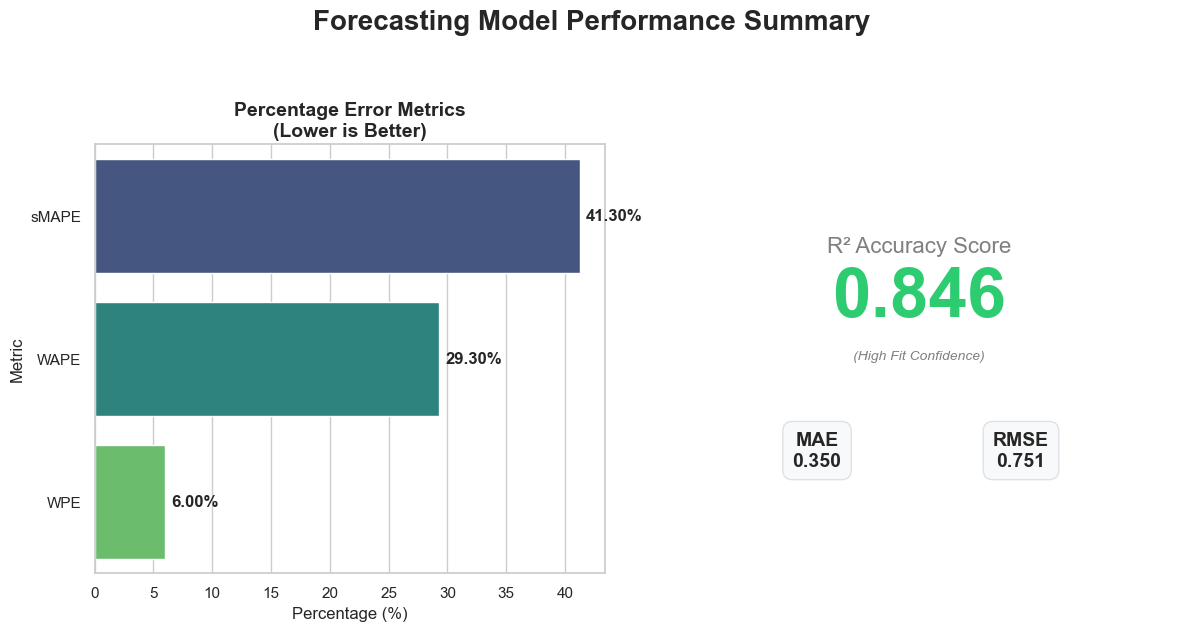

In [170]:
xgb_predection = xgb.predict(X_test)
plottingMetrics(y_test , xgb_predection)

##### CatBoost

In [220]:

cat = CatBoostRegressor(
    iterations=2000,
    task_type="GPU",
    devices="0",
    # subsample=0.1,
    learning_rate=0.05,
    depth=4,
    loss_function="MAE",
    random_seed=42,
    verbose=False,
    l2_leaf_reg= 10
)

cat.fit(X_train, y_train)



Default metric period is 5 because MAE is/are not implemented for GPU


In [43]:
# joblib.dump(cat, "Cat_Boost_final.pkl")
# cat = joblib.load("Cat_Boost_final.pkl")

In [221]:
cat_predection1 = cat.predict(X_train)
cat_predection2 = cat.predict(X_test)

print(evaluate_forecast(y_train, cat_predection1))
print(50*"-")
print(evaluate_forecast(y_test, cat_predection2))

{'MAE': 0.27574505175517666, 'RMSE': 0.4749342314874059, 'sMAPE': 40.970248109946304, 'WAPE': 27.613404565116145, 'WPE': 3.6476952166760808, 'R2': 0.8860167956100145}
--------------------------------------------------
{'MAE': 0.3584403190764378, 'RMSE': 0.8505954881465498, 'sMAPE': 41.767395501770025, 'WAPE': 30.043958001295568, 'WPE': 10.189866253987926, 'R2': 0.8020047184946678}


C:\Users\Abanob\AppData\Local\Temp\ipykernel_17588\2506690216.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Metric', data=df_pct, palette='viridis', ax=ax1)


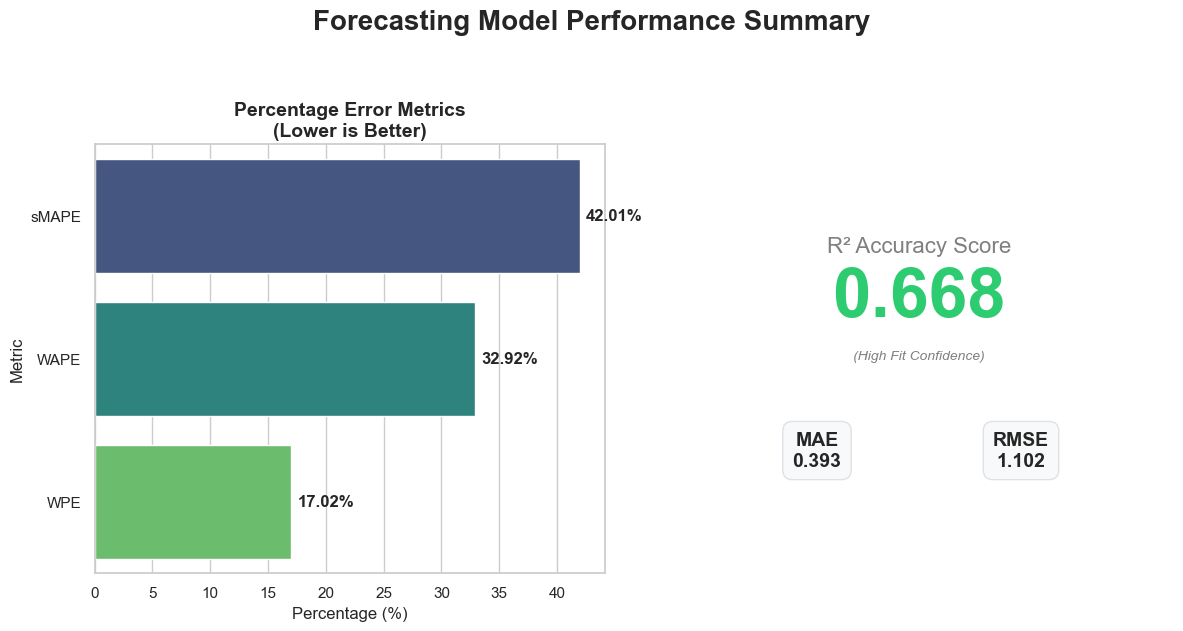

In [49]:
cat_preds = cat.predict(X_test)

plottingMetrics(y_test, cat_preds, y_train)


##### LightGBM

In [240]:
lgbm = lgb.LGBMRegressor(
    device="gpu",
    gpu_platform_id=0,
    gpu_device_id=0,
    n_jobs=1,
    max_bin=63,
    verbose=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    reg_lambda= 50,
    reg_alpha= 10,
    num_leaves= 64,
    n_estimators= 1000,
    max_depth =6,
    learning_rate =0.05,
    bagging_freq=1,
    bagging_fraction= 0.7
)

lgbm.fit(
    X_train, y_train,

)



LGBMRegressor(bagging_fraction=0.7, bagging_freq=1, colsample_bytree=0.8,
              device='gpu', gpu_device_id=0, gpu_platform_id=0,
              learning_rate=0.05, max_bin=63, max_depth=6, n_estimators=1000,
              n_jobs=1, num_leaves=64, random_state=42, reg_alpha=10,
              reg_lambda=50, subsample=0.8, verbose=-1)

In [ ]:
# joblib.dump(lgbm, "lightgbm_model.pkl")
lgbm = joblib.load("lightgbm_model.pkl")

In [241]:
lgbm_predection1 = lgbm.predict(X_train)
lgbm_predection2 = lgbm.predict(X_test)

print(evaluate_forecast(y_train, lgbm_predection1))
print(50*"-")
print(evaluate_forecast(y_test, lgbm_predection2))

{'MAE': 0.2548867135102133, 'RMSE': 0.3857145010392938, 'sMAPE': 39.772870117467775, 'WAPE': 25.52462825218492, 'WPE': -0.0002520404174169285, 'R2': 0.9248193893086822}
--------------------------------------------------
{'MAE': 0.34038924542841703, 'RMSE': 0.6757694558814998, 'sMAPE': 41.56297364956435, 'WAPE': 28.530942668766034, 'WPE': 5.686024560405945, 'R2': 0.8750299891629263}


In [245]:
lgbm = joblib.load("lightgbm_model.pkl")

In [247]:
lgbm_predection1 = lgbm.predict(X_train)
lgbm_predection2 = lgbm.predict(X_test)

print(evaluate_forecast(y_train, lgbm_predection1))
print(50*"-")
print(evaluate_forecast(y_test, lgbm_predection2))

{'MAE': 0.25432593055503494, 'RMSE': 0.38427584057960407, 'sMAPE': 39.84123114111745, 'WAPE': 25.46847084694412, 'WPE': 0.7446803310880994, 'R2': 0.9253791694677209}
--------------------------------------------------
{'MAE': 0.33271802238121356, 'RMSE': 0.7039465482637699, 'sMAPE': 40.698481737203764, 'WAPE': 27.887951658037686, 'WPE': 10.003728768613698, 'R2': 0.8643911420234627}
